In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df = df.loc[-df['TotalCharges'].str.contains(' ')]

In [4]:
df['TotalCharges']=df['TotalCharges'].astype(float)

# Data Cleansing

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- It appears that SeniorCitizen, tenure, MonthlyCharges, and TotalCharges contain numerical data, whereas other columns contain categorical data.
- gender, SeniorCitizen, Partner, Dependents, PhoneService, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, and Churn seem to contain only two types of unique values (1-or-0 for SeniorCitizen and yes-or-no for the rest).
- It appears that the content of each column corresponds with what its column is for.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


- There are 21 columns and 7032 rows in this data.
- The vast majority of columns contain categorical data.
- There are only four columns that contain numerical data.
- There are no missing values in this data.
- Each column contains the appropriate data type for its purpose.

## Missing Values

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- There are no missing values in this data.

## Duplicated Values

In [8]:
df.duplicated().sum()

0

- There are no duplicated values in this data.

# Exploratory Data Analysis

## Statistical Summary of Columns

In [9]:
categorical = ['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
numerical = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [10]:
df[numerical].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- There is nothing out of the ordinary regarding the maximum and minimum values of each column.
- SeniorCitizen contains only two types of unique values, 1 or 0, so there is no need to conclude its simmetricity.
- There is quite a difference between the mean and median (50%) scores of tenure, MonthlyCharges, and TotalCharges, which indicates that the distributions are rather skewed.

In [11]:
df[categorical].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


- Males with no partners and dependents make up most of our customers.
- The majority of our customers subscribed to our phone service and fiber optic internet service.
- Most of our customers pay their subscriptions month-to-month via electronic check.
- Our customer churn rate is low.
- gender, Partner, Dependents, PhoneService, PaperlessBilling, and Churn contain only two unique values (male-or-female for gender, and yes-or-no for the rest).

## Univariate Analysis

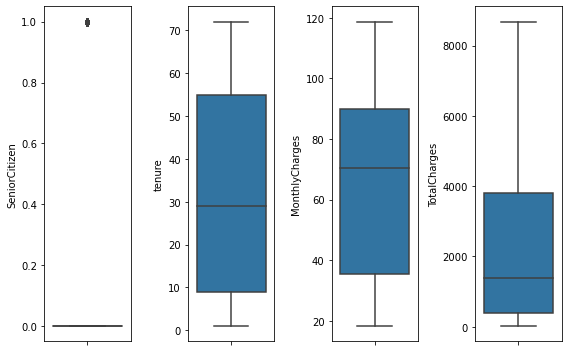

In [12]:
plt.figure(figsize=(8,5))
features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

- There is an outlier in SeniorCitizen.

In [13]:
outlier = df['SeniorCitizen'].max()
df[df['SeniorCitizen'] == outlier]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


- The outlier in SeniorCitizen is caused by the 0-or-1 unique values in the column. Because the majority of customers are not senior citizens (0), senior citizens (1) are counted as outliers. Therefore, there is no need to drop the outlier.

C:\Users\Jasmine Simamora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jasmine Simamora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jasmine Simamora\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

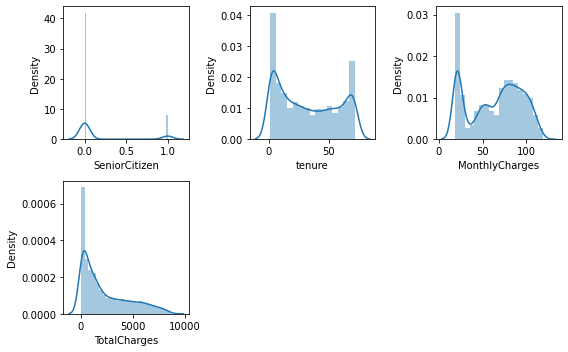

In [14]:
plt.figure(figsize=(8,5))
features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

- There are significantly more non-senior citizens than senior citizens subscribing to our services.
- The distribution of tenure, MonthlyCharges, and TotalCharges skews right.

## Multivariate Analysis

<AxesSubplot:>

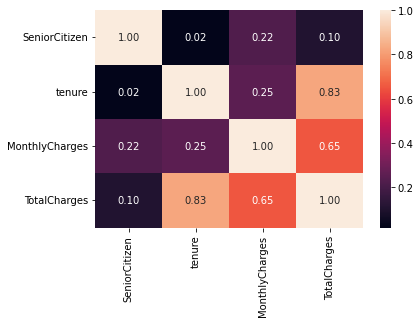

In [15]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

- There is a strong positive correlation between tenure and TotalCharges. When tenure increases, TotalCharges also increases.

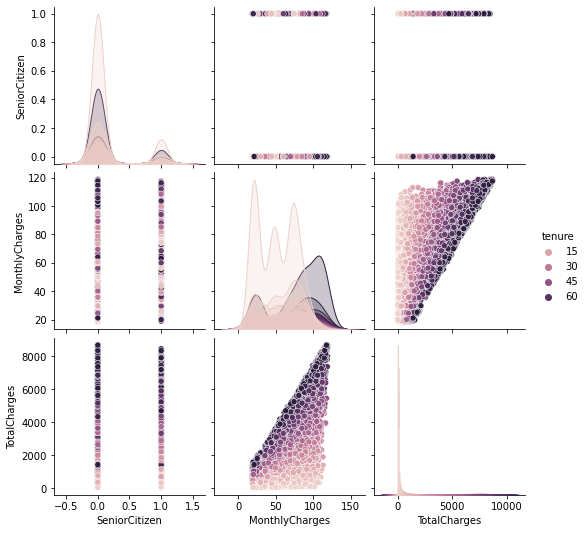

In [16]:
sns.pairplot(df, hue='tenure')

- Customers whose tenure are longer pay more in total charges and monthly charges.

# Deep Dive Exploration

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## How many senior citizens subscribed to our Fiber optic internet service?

In [19]:
df[(df['SeniorCitizen']==1)&(df['InternetService']=='Fiber optic')].reset_index()

,index,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
1,31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
2,50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
3,53,7495-OOKFY,Female,1,Yes,No,8,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes
4,55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
827,7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No
828,7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
829,7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


- Among our customers, 831 of them are senior citizens who subscribed to our Fiber optic internet service.

## What are the average total charges for different genders and age groups?

In [20]:
df.groupby(['gender','SeniorCitizen']).agg(
    avg_totalcharges = ('TotalCharges','mean')
).reset_index()

,gender,SeniorCitizen,avg_totalcharges
0,Female,0,2174.707256
1,Female,1,2839.934067
2,Male,0,2187.343126
3,Male,1,2781.304355


- Senior citizens spend on average more money on our services than male non-senior citizens.
- Male non-senior citizens spend on average more money on our services than female non-senior citizens.
- Female senior citizens spend on average more money on our services than male senior citizens.